# Crime Data Analysis: Exploring Patterns and Trends

## Introduction

For this project, I analyze a dataset about crimes in the USA.

My goal is to find patterns and understand more about crime in the USA. I want to see which crimes are most common, when they happen, and where they happen more often.

Some questions I want to answer are:

- What types of crimes happen the most?
- On which days and hours do crimes happen more?
- Which districts have more crimes?
- How many crimes include shootings?

I will use Python and popular libraries such as Pandas, Matplotlib and Seaborn.


## Importing libraries


In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Cleaning

In [205]:
data = pd.read_csv('data/crime.csv', encoding = 'latin1', parse_dates = ['OCCURRED_ON_DATE'], index_col = 0) 

In [206]:
data = data.drop(columns = ['Lat', 'Long', 'Location', 'UCR_PART', 'OFFENSE_CODE', 'REPORTING_AREA'])

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319073 entries, I182070945 to 142052550
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   OFFENSE_CODE_GROUP   319073 non-null  object        
 1   OFFENSE_DESCRIPTION  319073 non-null  object        
 2   DISTRICT             317308 non-null  object        
 3   SHOOTING             1019 non-null    object        
 4   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 5   YEAR                 319073 non-null  int64         
 6   MONTH                319073 non-null  int64         
 7   DAY_OF_WEEK          319073 non-null  object        
 8   HOUR                 319073 non-null  int64         
 9   STREET               308202 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 26.8+ MB


In [208]:
data.isna().sum

<bound method DataFrame.sum of                  OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION  DISTRICT  SHOOTING  \
INCIDENT_NUMBER                                                                
I182070945                    False                False     False      True   
I182070943                    False                False     False      True   
I182070941                    False                False     False      True   
I182070940                    False                False     False      True   
I182070938                    False                False     False      True   
...                             ...                  ...       ...       ...   
I050310906-00                 False                False     False      True   
I030217815-08                 False                False     False      True   
I030217815-08                 False                False     False      True   
I010370257-00                 False                False     False      True   
142052550

In [209]:
data['OFFENSE_DESCRIPTION'] = data['OFFENSE_DESCRIPTION'].str.lower()
data['OFFENSE_DESCRIPTION'] = data['OFFENSE_DESCRIPTION'].str.title()
data['OFFENSE_DESCRIPTION'] = data['OFFENSE_DESCRIPTION'].astype('category')

In [210]:
data['OFFENSE_CODE_GROUP'] = data['OFFENSE_CODE_GROUP'].astype('category')

In [211]:
data['DISTRICT'] = data['DISTRICT'].fillna('UNKNOWN')
data['DISTRICT'] = data['DISTRICT'].astype('category')

In [212]:
data['SHOOTING'] = data['SHOOTING'].apply(lambda x: True if x == 'Y' else False)

In [213]:
data['DAY_OF_WEEK'] = data['DAY_OF_WEEK'].astype('category')

In [214]:
data['STREET'] = data['STREET'].fillna('UNKNOWN')
data['STREET'] = data['STREET'].astype('category')

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319073 entries, I182070945 to 142052550
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   OFFENSE_CODE_GROUP   319073 non-null  category      
 1   OFFENSE_DESCRIPTION  319073 non-null  category      
 2   DISTRICT             319073 non-null  category      
 3   SHOOTING             319073 non-null  bool          
 4   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 5   YEAR                 319073 non-null  int64         
 6   MONTH                319073 non-null  int64         
 7   DAY_OF_WEEK          319073 non-null  category      
 8   HOUR                 319073 non-null  int64         
 9   STREET               319073 non-null  category      
dtypes: bool(1), category(5), datetime64[ns](1), int64(3)
memory usage: 14.8+ MB


In [216]:
data.isna().sum()

OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
dtype: int64

## Exploratory Data Analysis and Visualization

### What kind of crimes happen the most?

In [219]:
top_ten_crimes = data['OFFENSE_DESCRIPTION'].value_counts().head(10)

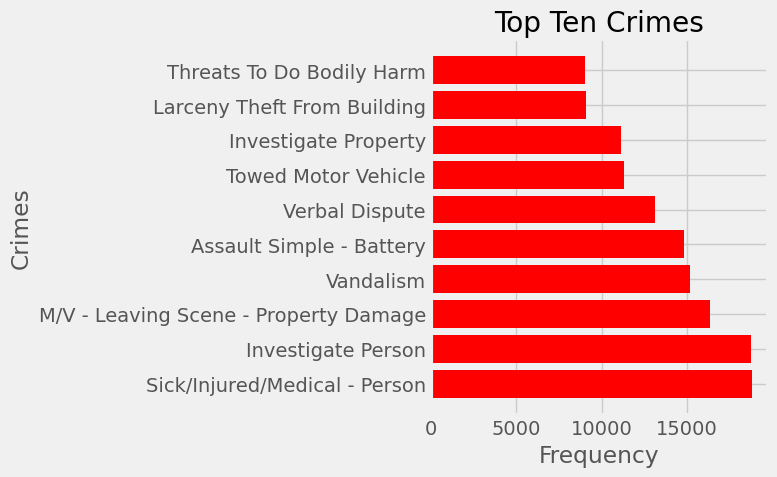

In [220]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
plt.barh(top_ten_crimes.index, top_ten_crimes, color = 'red')
plt.title('Top Ten Crimes')
plt.xlabel('Frequency')
plt.ylabel('Crimes')

plt.tight_layout()
plt.show()

These top ten crimes represent the most common types of incidents reported in the dataset, with Investigate Person and Sick/Injured/Medical - Person leading the count. This insight helps prioritize which crime categories might need more attention or resources.

### What hours have the highest crime rates? Which day of the week is most likely to have a crime? 

In [225]:
crime_byhour = data['HOUR'].value_counts().sort_index()
counts = data['DAY_OF_WEEK'].value_counts()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_byday = counts.reindex(ordered_days)

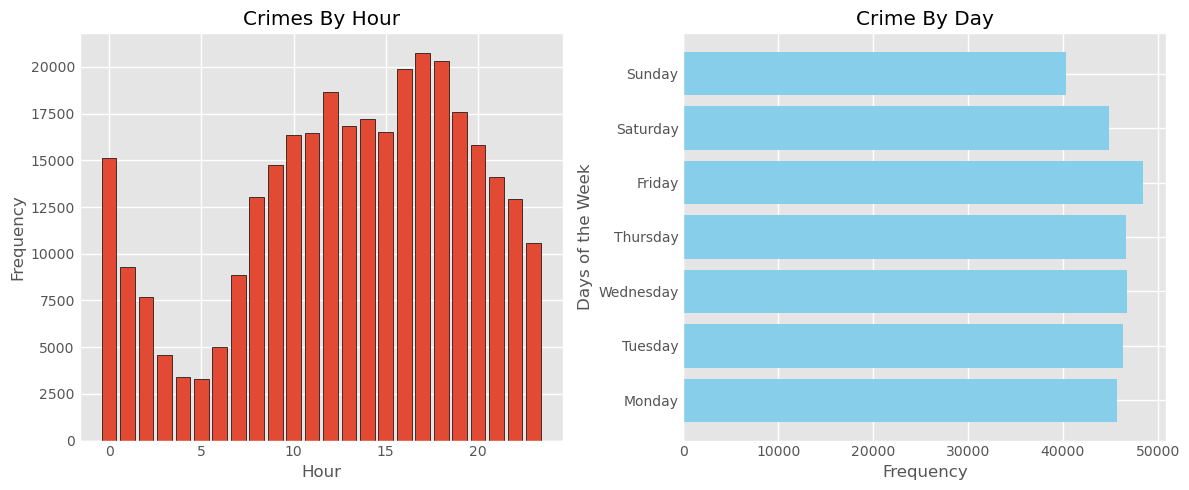

In [227]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1,2, figsize = (12, 5))
axs[0].bar(crime_byhour.index, crime_byhour, edgecolor = 'black')
axs[0].set_title('Crimes By Hour')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Hour')

axs[1].barh(crime_byday.index, crime_byday, color = 'skyblue')
axs[1].set_title('Crime By Day')
axs[1].set_ylabel('Days of the Week')
axs[1].set_xlabel('Frequency')


plt.tight_layout()
plt.show()

Most crimes happen on Fridays. The hours with the highest number of crimes are between 10:00 AM and 8:00 PM. This may be related to the time when people are more active outside.

### How many crimes are there per year?

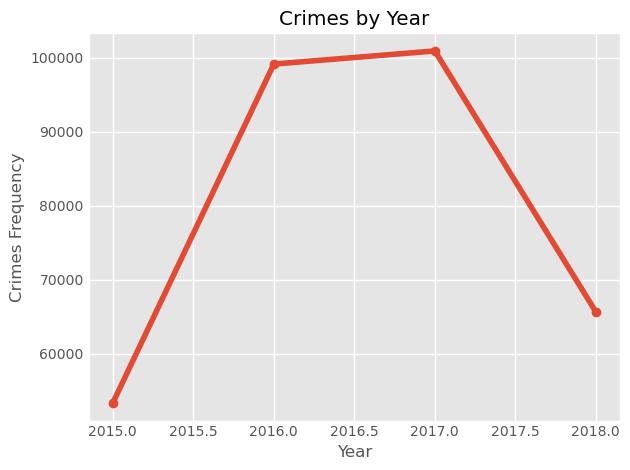

In [231]:
data.groupby('YEAR').size().plot(kind='line', marker='o')
plt.title('Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Crimes Frequency')

plt.tight_layout()
plt.show()

The number of crimes increased from 2015 to 2017. After that, we can see a decrease. This shows a possible change in crime patterns or police activity

### What is the proportion of crimes involving a shooting?

In [242]:
shooting = data['SHOOTING'].value_counts()
labels = ['Shooting' if val == True else 'No shooting' for val in shooting.index]
colors = ['#ff6666', '#66b3ff']

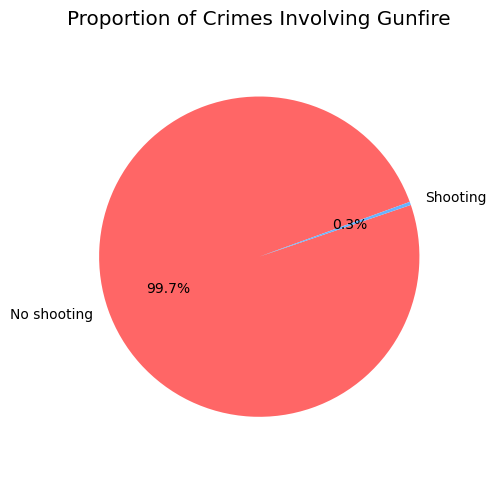

In [244]:
plt.figure(figsize=(5,5))
plt.pie(shooting, labels=labels, autopct='%1.1f%%', startangle=20, colors=colors)
plt.title('Proportion of Crimes Involving Gunfire')
plt.axis('equal')

plt.tight_layout()
plt.show()

Most crimes do not involve a shooting. Only a very small porcentage 
of the incidents include gunfire. This suggests that shooting are rare compared
to other types of crimes.

### How are crimes and hours are related?

C:\Users\user\AppData\Local\Temp\ipykernel_14796\3132774048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DISTRICT', y='HOUR', data=filtered_district, palette='Set3')


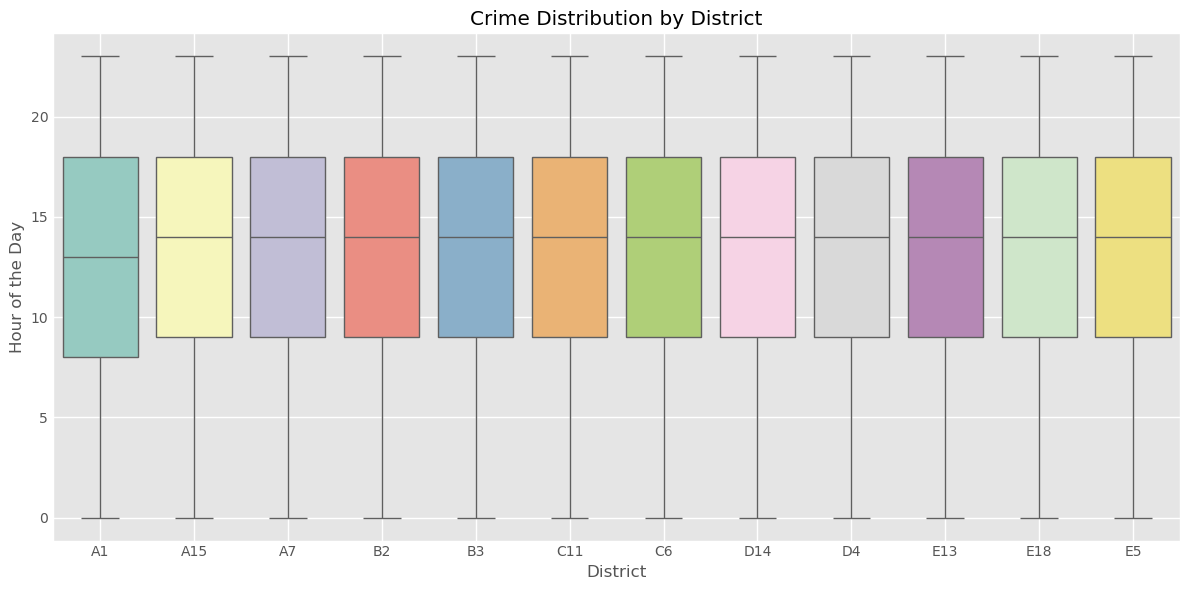

In [254]:
filtered_district = data[data['DISTRICT'] != 'UNKNOWN'].copy()

filtered_district['DISTRICT'] = filtered_district['DISTRICT'].cat.remove_categories('UNKNOWN')

plt.figure(figsize=(12,6))
sns.boxplot(x='DISTRICT', y='HOUR', data=filtered_district, palette='Set3')
plt.title('Crime Distribution by District')
plt.xlabel('District')
plt.ylabel('Hour of the Day')
plt.grid(True)

plt.tight_layout()
plt.show()


The plot shows that the most crimes in each district usually happen in the afternoon. especially around 2:00 PM. 